# **TRABAJO PRACTICO N°2: Clasificación de Emociones usando: NLP + NN + BERT + RoBERTa**

**Curso especializado: Data Science**

**Grupo: B**
*   Brito, Fred

**Docente:** Borda, Abraham.

**Resumen:** Este proyecto trata sobre el análisis de tuits, con el objetivo de realizar un Análisis de Sentimiento utilizando los modelos pre-entrenados BERT y RoBERTa, para luego implementar nuestro propio modelo de predección de sentimientos. 

En particular, tanto BERT como RoBERTa se ajustarán utilizando el conjunto de datos proporcionado para mejorar el rendimiento general del modelo.

Antes de enviar los datos a los algoritmos, los tweets se limpiarán profundamente para eliminar enlaces, hashtags al final de las oraciones y puntuación para permitir que los algoritmos comprendan mejor el texto y mejoren el rendimiento de la predicción.

**Objetivo:** El objetivo de este trabajo es perfilar el uso correcto de NLP.


# Introducción

## a.Procesamiento del Lenguaje Natural NLP

El **Procesamiento del Lenguaje Natural** (o **NLP** por sus siglas en Inglés: Natural Language Processing) es una de las “joyas de la corona”, hasta el momento inalcanzable, para el Machine Learning.

En el NLP se busca lograr que los humanos se puedan comunicar con los computadores usando el lenguaje natural (la conversación, el texto) en lugar de un lenguaje de computador.



Si queremos que un computador entienda lo que decimos, o lo que escribimos, tendrá que ser capaz de ejecutar varias tareas propias del NLP:

* **Inferencia:** dadas dos frases, debería ser capaz de predecir si la segunda frase guarda relación con la primera, o es una contradicción o la relación es neutral.

* **Equivalencia semántica:** determinar si dos preguntas son semánticamente equivalentes (es decir si significan lo mismo).

* **Pregunta-respuesta:** dado un pasaje y una pregunta, encontrar en el texto la respuesta correspondiente.

* **Respuesta correcta:** dada una frase, determinar su continuación entre 4 posibles opciones.

* **Aceptabilidad lingüística:** dada una frase identificar si esta es gramaticalmente correcta.

* **Análisis de sentimientos:** dado un texto identificar si el sentimiento que se está expresando es positivo, negativo o neutral. *El cual es nuestro caso*.

<img src="https://www.codificandobits.com/img/posts/2020-07-13/analisis-de-sentimientos.jpg" width="400px">


## b.¿Qué es BERT?

Y aunque durante los últimos años ha habido desarrollos impresionantes, solo hasta 2018 apareció BERT, una nueva arquitectura desarrollada por Google que marcó el inicio de una nueva era en el natural language processing.

¡BERT no es Beto, el personaje de Plaza Sésamo!. Su nombre viene de las siglas en Inglés B**idirectional Enconder Representations from Transformers**; es decir, es un codificador que obtiene representaciones bidireccionales a partir de **Redes Transformer**.



<img src="https://i.imgur.com/3tASSmp.jpg" width="300px">






Básicamente los autores de BERT proponen lo siguiente: ¿por qué no en lugar de crear un modelo que resuelva cada tarea individualmente, se entrena un modelo base que aprenda a interpretar el lenguaje en general?.

Donde el modelo base puede ser pre-entrenado con sets de datos inmensos, y luego de agregar la capa especializada se puede re-entrenar el modelo con sets más pequeños para que realice tareas más específicas.

Y luego, a este modelo ya entrenado, le agregamos unas capas adicionales que permitan que el modelo se especialice en una tarea en particular. 




<img src="https://www.codificandobits.com/img/posts/2020-07-13/bert-capa-adicional.jpg" width="300px">

## c.Arquitectura de Bert

BERT nace precisamente de las Redes Transformer, un nuevo tipo de arquitectura creado en 2017 y que ha sido el precursor de toda esta revolución en el NLP.

La Red Transformer procesa el texto en **dos fases**: una para la codificación encargada de procesar el texto de entrada y de codificarlo numéricamente extrayendo su información más relevante, y una fase de decodificación que se encarga de generar una nueva secuencia de texto (que es útil por ejemplo cuando se hace la traducción de un idioma a otro). En ambos casos cada bloque está conformado por múltiples codificadores y decodificadores.

Bien, pues con BERT lo que nos interesa es tener un modelo capaz de codificar el texto, obteniendo así una representación numérica que permita su correcta interpretación. Así que BERT es simplemente el resultado de tomar la red transformer y quedarnos únicamente con el bloque de codificación.



En ambos casos es necesario adecuar el texto de entrada para que la red pueda procesarlo.

En las tareas que vimos anteriormente el dato de entrada siempre estará conformado por dos elementos, bien sea dos frases, un párrafo y una pregunta, o dos preguntas. Así que el texto de entrada se codifica como dos frases:

1.  Al inicio se incluye siempre un token de clasificación (CLS) y para separar una frase de otra se incluye el token de separación (SEP). En un momento veremos el papel de estos tokens.

 




<img src="https://www.codificandobits.com/img/posts/2020-07-13/tokens-inicio-separacion.jpg" width="500px">

2.  Después, por cada token se obtienen tres representaciones:

* Un embedding, que representa el token como un vector.

* Codificación posicional, como las usadas en la red transformer original. Recordemos que la codificación posicional es necesaria para indicarle al bloque de codificación la posición relativa de cada palabra dentro de la frase, pues todas las palabras son procesadas de manera simultánea por la red.

* Adicional a estas dos codificaciones se añade un embedding que indica a qué segmento pertenece la frase: la primera frase (antes del separador) se codifica con un embedding diferente al de la segunda frase.

3.  Finalmente se suman estas tres representaciones y los vectores resultantes son procesados por BERT:

<img src="https://www.codificandobits.com/img/posts/2020-07-13/entrada-a-bert.jpg" width="500px">

## d.Pre-entrenamiento

En la primera fase BERT es pre-entrenado usando dos sets gigantescos: Wikipedia y google books, que en conjunto contienen más de 3.000 millones de palabras!

Con este entrenamiento BERT aprende a analizar el texto de manera bidireccional, es decir que aprende a codificar cada palabra teniendo en cuenta todo su contexto: tanto lo que está a su derecha como a su izquierda.

Por ejemplo, una misma palabra puede tener dos significados distintos dependiendo de su contexto. Con esta bidireccionalidad es posible codificar de manera precisa su significado.

<img src="https://www.codificandobits.com/img/posts/2020-07-13/pre-entrenamiento-bidireccionalidad.jpg" width="500px">

Para lograr esto primero se enseña al modelo a completar una palabra faltante en una frase. Esta palabra faltante puede estar en cualquier ubicación, y con esto se está forzando al modelo a que aprenda a analizar el texto de manera bidireccional. Aprendiendo así a comprender el lenguaje tal como lo hacemos los seres humanos.

Ahora se continua con el pre-entrenamiento enseñando al modelo a predecir la continuación de una frase.

Esta tarea se sencilla: dadas dos frases (A y B) ¿es B realmente la frase que viene después de A o es simplemente una frase aleatoria?

Para que BERT aprenda a identificar estas diferencias, durante el pre-entrenamiento el 50% de las veces la frase B es efectivamente la que sigue a “A” y el 50% de las veces restantes no lo es.

Y listo, con estas dos tareas ya se tendrá un modelo bastante robusto que es capaz de representar de manera muy completa relaciones bidireccionales entre palabras y frases.

## e.Afinación

Culminado el pre-entrenamiento resulta muy sencillo afinar el modelo para tareas específicas.

Al modelo pre-entrenado se agregan dos pequeñas capas: una red neuronal y una capa softmax.

<img src="https://www.codificandobits.com/img/posts/2020-07-13/bert-afinacion.jpg" width="500px">


Luego se presentan las frases de la tarea específica y se re-entrena el modelo de extremo a extremo, con la única diferencia de que esta fase requiere menos tiempo pues el modelo ya ha sido pre-entrenado en la fase anterior.

Cuando se tienen tareas como inferencia, equivalencia semántica, análisis de sentimientos o aceptabilidad lingüística, se tiene simplemente un problema de clasificación. Así que a la salida de BERT se analizará únicamente la representación correspondiente al token de clasificación, pues al ser bidireccional BERT condensa toda la información necesaria para la clasificación en este único token.

Para las tareas tipo pregunta-respuesta se usa un esquema similar. La única diferencia es que al final la red neuronal y la capa softmax no entregarán una categoría, como en el caso anterior, sino que realizarán la predicción de los tokens de inicio y finalización de la respuesta encontrada dentro del texto.

## f.Las Arquitecturas BERT, RoBERTa

Y esta arquitectura viene en varios sabores, como por ejemplo: 
* **BERT básico:**con un total de 12 codificadores y 110 millones de parámetros. Entrenado con aproximadamente 16GB de datos. Ver https://huggingface.co/bert-base-uncased

* **BERT large:** la versión más completa y más poderosa, con 24 codificadores y 340 millones de parámetros. Ver https://huggingface.co/bert-large-uncased

* **RoBERTa básico:** con un total de 12 codificadores y 110 millones de parámetros. Es más robusto que BERT debido a que fue entrenado con aproximadamente 160GB de datos y para largos conjuntos de datos (batches). Posee Generación de Máscaras Dinámicas y no posee NSP objective. Ver https://huggingface.co/roberta-base


<img src="https://www.codificandobits.com/img/posts/2020-07-13/bert-basico-y-large.jpg" width="300px">

# 1.Importamos desde Librerías



In [ ]:
# Librerías Numpy y Pandas
import numpy as np
import pandas as pd

# Librerías Plot de Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías Plot de WordCloud
from wordcloud import WordCloud, STOPWORDS

# Librería Limpieza texto: Spicy
import spacy

# Librería SciPy provides algorithms for optimization, statistics, etc.
from scipy import stats  

# Librería Limpieza texto: Language Toolkit (NLTK)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# Librería for expanding and creating common English contractions in text
!pip install contractions 
import contractions

# Librería de Expresiones Regulares 
import re

# Importamos metricas de la Librería de Scikitlearn
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Librerías Redes Neuronales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Instalar Transformers
! pip install transformers

     |████████████████████████████████| 3.5 MB 8.1 MB/s 
     |████████████████████████████████| 67 kB 6.4 MB/s 
     |████████████████████████████████| 895 kB 64.3 MB/s 
     |████████████████████████████████| 6.5 MB 44.2 MB/s 
     |████████████████████████████████| 596 kB 50.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# 2.Carga de Datos

**Descripción de Datos:** Lista de documentos .txt en idioma Inglés. Contiene  lineas de texto que representan emociones y sus respectivas etiquetas que clasifican dicha emociones, la cual puede pertenecer a una de las siguientes clases:
* 'sadness'
* 'anger'
* 'love'
* 'surprise'
* 'fear'
*  'joy

El conjunto de datos se encuentra dividido en train.txt, test.txt y val.txt para facilitar la construcción del modelo de aprendizaje automático.

  Los mismos serán importados desde kaggle:
  https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp

  Se puede usar la API command de kaggle:
  `kaggle datasets download -d praveengovi/emotions-dataset-for-nlp`

| Etiqueta | Tipo de Dato | Descripción |
| :--- | :--- | :--- |
| text  | Texto (string)   | Linea de texto que expresa un sentimiento | 
| emotion  | Texto (string) | Etiqueta de emoción expresado en text| 

Ejemplo:

| text | emotion |
| :--- | :--- | 
| i feel like I am still looking at a blank canvas blank pieces of paper  | sadness  |  

**Nota:** La columna text ya posee un preprocesamiento de limpieza de datos.


## 2.1.Importamos Datos desde Kaggle usando la API

In [ ]:
#Install Kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 5.5 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=bb4aee9e216031b56b2e6799870b13d2b35cf3fd8ed7b7f1403266ea84a37be8
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle -v

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# Para introducir el token de kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fredbrito","key":"46508726c89e6c9f2bde17cf187d5973"}'}

In [ ]:
#Create a kaggle folder
#! mkdir ~/.kaggle

#Copy the kaggle.json to folder created
#! cp kaggle.json ~/.kaggle/

# Permissions for the json to act
#! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# to list all datasets in kaggle
#! kaggle datasets list

In [ ]:
# Use de API command
! kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 118MB/s]


In [ ]:
# Unzip the Data
!unzip /content/emotions-dataset-for-nlp.zip

Archive:  /content/emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


## 2.2.Cargamos los Datasets:

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP2/train.txt', names=['text', 'emotion'], sep=';')
#test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP2/test.txt' , names=['text', 'emotion'], sep=';')
#val   = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP2/val.txt'  , names=['text', 'emotion'], sep=';')

Cargamos datos bajados desde Kaggle

In [ ]:
train = pd.read_csv('/content/train.txt', names=['text', 'emotion'], sep=';')
test = pd.read_csv('/content/val.txt', names=['text', 'emotion'], sep=';')
val = pd.read_csv('/content/test.txt', names=['text', 'emotion'], sep=';')

In [ ]:
train.head(5)

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
test.head(5)

,text,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
val.head(5)

,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


# 3.Análisis Exploratorio de Datos - Exploratory Data Analysis EDA

Para facilitar el EDA juntamos todos los dataframes en uno solo llamado **data**

In [ ]:
# Juntamos todos los Datasets en un unico Dataset llamado 
data = {'Train Data': train, 'Test Data': test, 'Validation Data': val }

In [ ]:
#data['Train Data']["text"].to_frame()

## 3.1.Dimensiones de los Datasets

In [ ]:
for selec_data in data:
    print(selec_data)
    print("Número de Filas: "   ,data[selec_data].shape[0])
    print("Número de Columnas: ",data[selec_data].shape[1])
    print('*'*20)

Train Data
Número de Filas:  16000
Número de Columnas:  2
********************
Test Data
Número de Filas:  2000
Número de Columnas:  2
********************
Validation Data
Número de Filas:  2000
Número de Columnas:  2
********************


## 3.2.Valores NaN 

In [ ]:
print("Valores NaN","\n")
for selec_data in data:
    print(selec_data)
    print(data[selec_data].isnull().sum())
    print('*'*20)

Valores NaN 

Train Data
text       0
emotion    0
dtype: int64
********************
Test Data
text       0
emotion    0
dtype: int64
********************
Validation Data
text       0
emotion    0
dtype: int64
********************


Podemos observar que los datos no poseen valores NaN

## 3.3.Distribucion de la Clase "**emoción**" en los distintos datasets

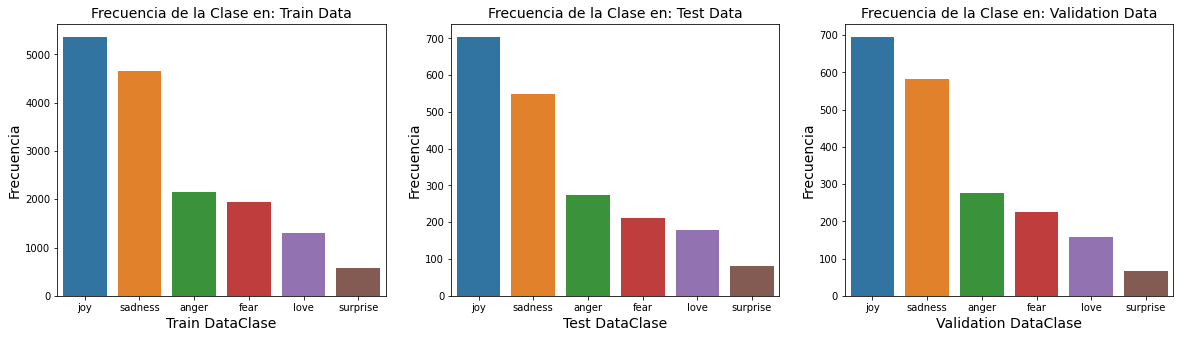

In [ ]:
bar, ax = plt.subplots(1,3, figsize=(20, 5))

for index, selec_data in enumerate(data):
    sns.countplot(ax = ax[index], 
                  x = "emotion", 
                  data = data[selec_data],
                  order = data[selec_data]["emotion"].value_counts().index)
    
    ax[index].set_title("Frecuencia de la Clase en: " + selec_data, size=14)
    ax[index].set_ylabel("Frecuencia", size=14)
    ax[index].set_xlabel(selec_data + "Clase", size=14)

Es evidente que el conjunto de datos está muy desequilibrado. La clase **"joy"** tiene la frecuencia más alta y la **"surprice"** tiene la menor frecuencia en los tres conjuntos de datos. Para solucionar este incoveniente equilibraremos los datos en la sección **FALTA NUMERO**

## 3.4.Word Cloud (sin Limpieza de Datos)

In [ ]:
%matplotlib inline
def cloud(data,title,backgroundcolor = 'black', width = 600, height = 600):           # Creamos la Función que me Generala La Nube de Palabras
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor,
                          width = width, 
                          height = height).generate(data)
                          
    plt.figure(figsize = (10, 10))
    plt.title(title + ' Word Cloud', size = 10)
    plt.imshow(wordcloud)
    plt.axis("off")
    #plt.show()

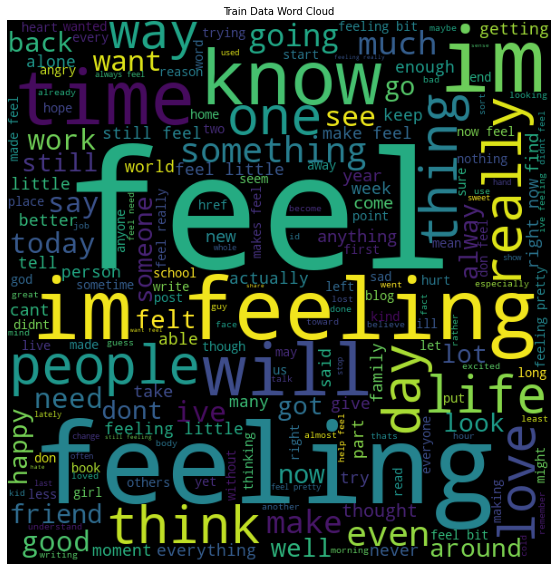

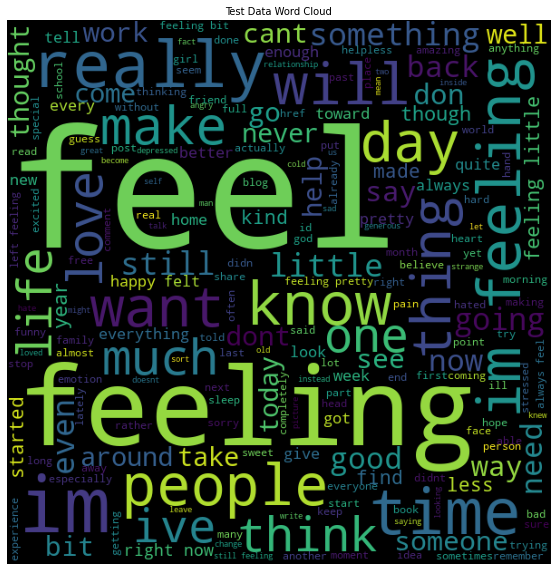

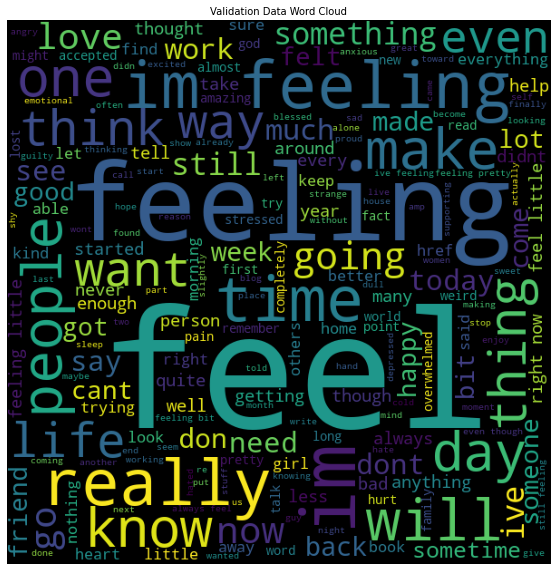

In [ ]:
for selec_data in data:
    cloud(' '.join(data[selec_data]["text"]),selec_data)

# 4.Pre-Procesamiento de los Datos 

## 4.1.Limpieza de Datos

Vamos a limpiar los datos de la columna **"text"**. Dicha Limpieza incluirá:

1. Remover stopwords (excluyendo las negative words) usando  la Librería Limpieza texto **Language Toolkit (NLTK)**.
2. Expandir Contracciones en Inglés Contractions usando la librería **contractions**
3. Lemmatization usando  la Librería Limpieza texto **Language Toolkit (NLTK)**.

**Note:** Las Negative words son removidas del set de stopwords, para evitar que después de la limpieza de datos, por ejemplo: 

> "I am not happy" -->  "happy" .

En resumen, evitamos cambiar el significado semántico de la oración y dar como resultado un entrenamiento incorrecto.


In [ ]:
# Seteamos idioma de stopwords
stop_words = set(stopwords.words('english'))

# Seteamos las stopword que queremos que no se eliminen del texto
negative = ['not', 'neither', 'nor', 'but', 'however', 'although', 'nonetheless', 'despite', 'except',
                'even though', 'yet']

# Actualizamos la lista de stopwords
new_list=[]
for text in stop_words:
  if text not in negative:
    new_list.append(text)
stop_words = new_list

stop_words

['yours',
 'isn',
 'than',
 'how',
 'won',
 'there',
 'me',
 'ours',
 'again',
 'they',
 'before',
 "aren't",
 'wasn',
 'y',
 'over',
 'ourselves',
 'about',
 'o',
 'that',
 'few',
 "doesn't",
 "you've",
 'our',
 'haven',
 'were',
 'hadn',
 'yourself',
 'what',
 'been',
 'have',
 'do',
 'both',
 'don',
 'hasn',
 "won't",
 'is',
 "shouldn't",
 "she's",
 'and',
 'now',
 'yourselves',
 "don't",
 'as',
 'more',
 "you'll",
 'mightn',
 'does',
 'him',
 'between',
 "shan't",
 'same',
 'at',
 'it',
 'from',
 't',
 'just',
 'itself',
 'i',
 'theirs',
 'its',
 'into',
 'too',
 'until',
 'most',
 'can',
 'll',
 'to',
 'm',
 'herself',
 'was',
 'after',
 'being',
 'down',
 'those',
 'each',
 'above',
 'having',
 'shouldn',
 'here',
 'her',
 'then',
 'd',
 'ain',
 'he',
 "wasn't",
 'should',
 'you',
 'your',
 'hers',
 "isn't",
 'will',
 'some',
 "mightn't",
 'be',
 'doing',
 's',
 'under',
 'himself',
 'had',
 'on',
 "needn't",
 'a',
 "it's",
 'who',
 'if',
 'ma',
 "weren't",
 'of',
 'no',
 "wouldn

In [ ]:
def clean_text(text):                                                           # Creamos la Función que limpia los datos
  # Cargamos Spacy en Idioma Inglés
  nlp = spacy.load("en_core_web_sm")
  nlp

  clean_text = []
  for token in nlp(text):                                                       # Recorre texto
    if not token.is_stop and  not token.is_punct:                               # Prueba si es un Signo de Puntuación y un Stop Word
        clean_text.append(token.text)                                           # Agrega texto 

  return " ".join(clean_text)

In [ ]:
def preprocess(sentence):

    # Aplicamos Expresiones Regulares
    sentence = re.sub('[^A-z]', ' ', sentence)

    # Seteamos idioma de stopwords
    stop_words = set(stopwords.words('english'))

    # Seteamos las stopword que queremos que no se eliminen del texto
    negative = ['not', 'neither', 'nor', 'but', 'however', 'although', 'nonetheless', 'despite', 'except',
                'even though', 'yet']

    # Actualizamos la lista de stopwords
    new_list=[]
    for text in stop_words:
      if text not in negative:
        new_list.append(text)
    stop_words = new_list

    # Creamos Objeto para lematización
    lemmatizer = WordNetLemmatizer()

    # Aplicamos la Lematización - Contraccione - Minusculas 
    clean_text = []
    for token in sentence.split():                                                       
      if token not in stop_words:                               
        clean_text.append(lemmatizer.lemmatize(contractions.fix(token.lower())))                                        

    return ' '.join(clean_text)

In [ ]:
a="I'm fell Very sick. We are not from Canada. You're under the floor. I'm driving very fast"

In [ ]:
preprocess(a)

'i fell very sick we not canada you floor i driving fast'

In [ ]:
clean_text(a)

'fell sick Canada floor driving fast'

In [ ]:
train['text'] = train['text'].apply(lambda x: preprocess(x))
test['text']  = test['text'].apply(lambda x: preprocess(x))
val['text']   = val['text'].apply(lambda x: preprocess(x))

In [ ]:
train

,text,emotion
0,did not feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,i am grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger
...,...,...
15995,brief time beanbag said anna feel like beaten,sadness
15996,turning feel pathetic still waiting table subb...,sadness
15997,feel strong good overall,joy
15998,feel like rude comment i am glad,anger


## 4.2. Balanceo de Datos

Como vimos en la **sección 3.3**, la distribución de la Clase "**emoción**" se encuentran no balanceados en nuestros datasets. Una solución es usar **RandomOverSampler** para añadir repetición de datos a todas las clases exceptuando las clases con alta frecuencia de ocurrencia.

In [ ]:
# Importamos Libreria imblearn
from imblearn.over_sampling import RandomOverSampler

# Generamos Objeto 
ros = RandomOverSampler(random_state=0)

# Entrenamos el Resample
# Nota: inputs de RandomOverSampler deben ser array de 1D --> transformamos 1D
train_x, train_y = ros.fit_resample(np.array(train['text']).reshape(-1, 1),
                                    np.array(train['emotion']).reshape(-1, 1))

# Train to DataFrame
train = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text', 'emotion'])

In [ ]:
train.head()

,text,emotion
0,did not feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,i am grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


In [ ]:
train.shape

(32172, 2)

Vemos que el tamaño de nuestro dataframe de train creció. Ahora comprobemos el balanceo de las clases como se vio en la seccion 3.4:

In [ ]:
train["emotion"].value_counts()

sadness     5362
anger       5362
love        5362
surprise    5362
fear        5362
joy         5362
Name: emotion, dtype: int64

Text(0.5, 0, 'Clase')

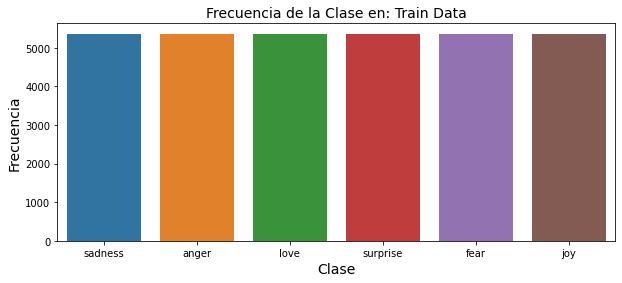

In [ ]:
bar, ax = plt.subplots(figsize=(10, 4))

sns.countplot(data = train,
              x = "emotion", 
              order = train["emotion"].value_counts().index)  

ax.set_title("Frecuencia de la Clase en: Train Data", size=14)
ax.set_ylabel("Frecuencia", size=14)
ax.set_xlabel("Clase", size=14)

## 4.3. Aplicamos One-Hot Encoder a la variable target  

Aplicamos One-Hot Encoder a **"emotion"** para todos los Datasets 

In [ ]:
np.array(train['emotion']).reshape(-1, 1)

array([['sadness'],
       ['sadness'],
       ['anger'],
       ...,
       ['surprise'],
       ['surprise'],
       ['surprise']], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)

y_train = ohe.fit_transform(np.array(train['emotion']).reshape(-1, 1))
y_test =  ohe.fit_transform(np.array(test['emotion']).reshape(-1, 1))
y_val =   ohe.fit_transform(np.array(val['emotion']).reshape(-1, 1))

In [ ]:
ohe.categories_

[array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
       dtype=object)]

In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [ ]:
y_train.shape

(32172, 6)

# 5.Encoding

<img src="https://www.codificandobits.com/img/posts/2020-07-13/tokens-inicio-separacion.jpg" width="500px">

Hay una función muy útil llamada **encode_plus provided** en el Tokenizer class. Puede realizar sin problemas las siguientes operaciones:

*   Tokenizar el texto y Añadir special tokens - [CLS] y [SEP]
*   Crea input IDs
*   Rellena (Pad) las oraciones a una longitud máxima
*   Cree máscaras de atención (attention masks) para los tokens PAD anteriores

**Nota:** RoBERTa usa un byte-level Byte-Pair Encoding (BPE) en contraste con BERT el cual usa character-level BPE.


## 5.1.Encoding con Bert


In [ ]:
# Importamos el Tokenizador de Bert
from transformers import BertTokenizerFast
tokenizerBert = BertTokenizerFast.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def bert_encode(data,maximum_length) :
  # Crea Variable de Inputs IDs
  input_ids = []

  # Crea Variable de Máscaras de atención
  attention_masks = []
  
  for i in range(len(data.text)):                                     # Recorre data
      encoded = tokenizerBert.encode_plus(data.text[i],                   # Texto a tokenizar
                                      add_special_tokens=True,        # Whether or not to encode the sequences with the special tokens relative to their model.
                                      max_length=maximum_length,      # Pad to a maximum length specified with the argument max_length
                                      pad_to_max_length=True,
                                      return_attention_mask=True)
      
      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])

  return np.array(input_ids),np.array(attention_masks)

In [ ]:
# Longitud del texto con máxima longitud en train
# Longitud del texto con máxima longitud en train
max_len = max([len(x.split()) for x in train['text']])

# Aplicamos en Encoder a los datasets
train_input_ids_bert , train_attention_masks_bert  = bert_encode(train, max_len)
test_input_ids_bert  , test_attention_masks_bert   = bert_encode(test,  max_len)
val_input_ids_bert   , val_attention_masks_bert    = bert_encode(val,   max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


## 5.2.Encoding con Roberta

In [ ]:
# Importamos el Tokenizador de Roberta
from transformers import RobertaTokenizerFast
tokenizerRoberta = RobertaTokenizerFast.from_pretrained("roberta-base")

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
def roberta_encode(data,maximum_length) :
  # Crea Variable de Inputs IDs
  input_ids = []

  # Crea Variable de Máscaras de atención
  attention_masks = []
  
  for i in range(len(data.text)):                                     # Recorre data
      encoded = tokenizerRoberta.encode_plus(data.text[i],                   # Texto a tokenizar
                                      add_special_tokens=True,        # Whether or not to encode the sequences with the special tokens relative to their model.
                                      max_length=maximum_length,      # Pad to a maximum length specified with the argument max_length
                                      pad_to_max_length=True,
                                      return_attention_mask=True)
      
      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])

  return np.array(input_ids),np.array(attention_masks)

In [ ]:
# Longitud del texto con máxima longitud en train
max_len = max([len(x.split()) for x in train['text']])

# Aplicamos en Encoder a los datasets
train_input_ids_roberta  , train_attention_masks_roberta  = roberta_encode(train, max_len)
test_input_ids_roberta   , test_attention_masks_roberta   = roberta_encode(test,  max_len)
val_input_ids_roberta    , val_attention_masks_roberta    = roberta_encode(val,   max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
train_input_ids_roberta

array([[    0, 24001,    45, ...,     1,     1,     1],
       [    0,  2977,  2157, ...,     1,     1,     1],
       [    0,   118,   524, ...,     1,     1,     1],
       ...,
       [    0, 35702, 10691, ...,     1,     1,     1],
       [    0,  7068, 10244, ...,     1,     1,     1],
       [    0,   118,   524, ...,     1,     1,     1]])

In [ ]:
train_attention_masks_roberta

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
train_input_ids_roberta.shape, train_attention_masks_roberta.shape

((32172, 43), (32172, 43))

# 6.Creación del Modelo

<img src="https://www.codificandobits.com/img/posts/2020-07-13/bert-afinacion.jpg" width="500px">


How RoBERTa is better than BERT ??

Changes in Pre-Training:

*   without NSP objective
*   with dynamic mask generation

Changes in Data:

*   Trained on more data (16GB BERT vs 160GB RoBERTa)
*   Trained on large batches

**Note:** Pre-requistics is to go through BERT

**References:**



## 6.1.Modelo con Bert

In [ ]:
# Importamos transformer Bert
from transformers import TFBertModel

# Cargamos el modelo de Roberta pre-entrenado y generamos un objeto
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
def create_model_bert(bert_model, max_len):
    # Creamos los Inputs
    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')                  # Inputs_ids
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')            # Máscaras de atención

    # Creamos outputs
    output = bert_model([input_ids,attention_masks])                            # Usamos el modelo de Berta con argumentos inputs_ids y attention_masks
    output = output[1]                                                          # Nos quedamos con la columna 1
    output = tf.keras.layers.Dense(6, activation='softmax')(output)             # Ultima capa "Softmax" densa para las 6 Categorias
    
    # Contruye la Arquitectura del Modelos definiendo los inputs y outputs
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],
                                  outputs = output)

    # Compila el Modelo con:
    # -> Optimizador "Adam" con un learning rate de 1e-5
    # -> Funcion de perdida "categorical_crossentropy"
    # -> La metrica "accuracy"
    model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Crea el modelo
model_bert = create_model_bert(bert_model, max_len)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Resumen del Modelo
model_bert.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_3[0][0]',                
                                thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 43,                                          

Graficamos el Modelo

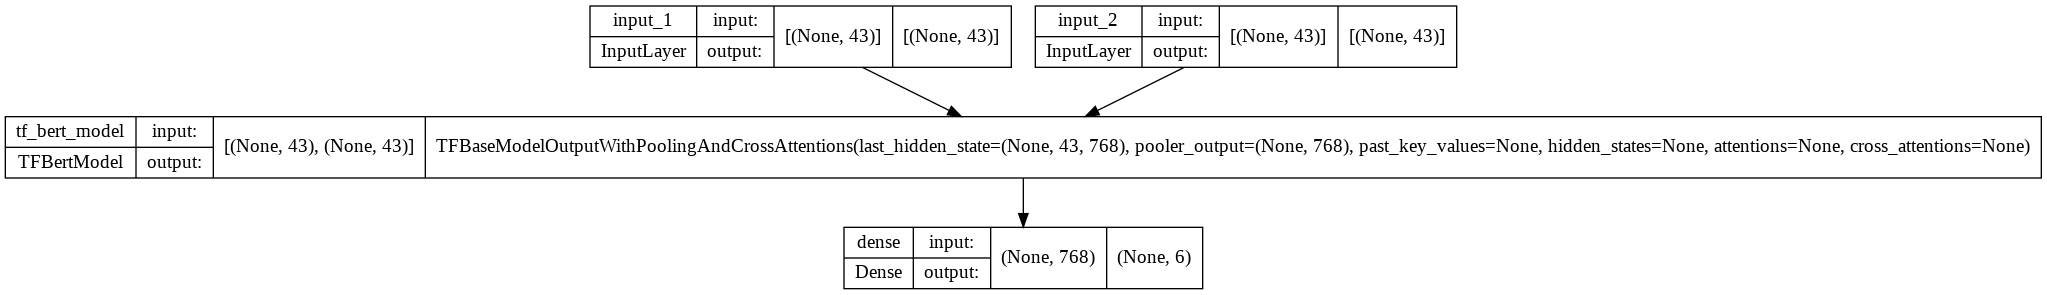

In [ ]:
tf.keras.utils.plot_model(model_bert, to_file="my_model_bert.png", show_shapes=True)

## 6.2.Modelo con Roberta

In [ ]:
from transformers import TFRobertaModel

# Cargamos el modelo de Roberta pre-entrenado y generamos un objeto
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
def create_model_roberta(roberta_modelo, max_len):
    # Creamos los Inputs
    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')                  # Inputs_ids
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')            # Máscaras de atención

    # Creamos outputs
    output = roberta_model([input_ids,attention_masks])                            # Usamos el modelo de Berta con argumentos inputs_ids y attention_masks
    output = output[1]                                                          # Nos quedamos con la columna 1
    output = tf.keras.layers.Dense(6, activation='softmax')(output)             # Ultima capa "Softmax" densa para las 6 Categorias
    
    # Contruye la Arquitectura del Modelos definiendo los inputs y outputs
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],
                                  outputs = output)

    # Compila el Modelo con:
    # -> Optimizador "Adam" con un learning rate de 1e-5
    # -> Funcion de perdida "categorical_crossentropy"
    # -> La metrica "accuracy"
    model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Crea el modelo
model_roberta = create_model_roberta(roberta_model, max_len)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Resumen del Modelo
model_roberta.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_5[0][0]',                
 el)                            thPoolingAndCrossAt               'input_6[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 43,                                          

Graficamos el modelo

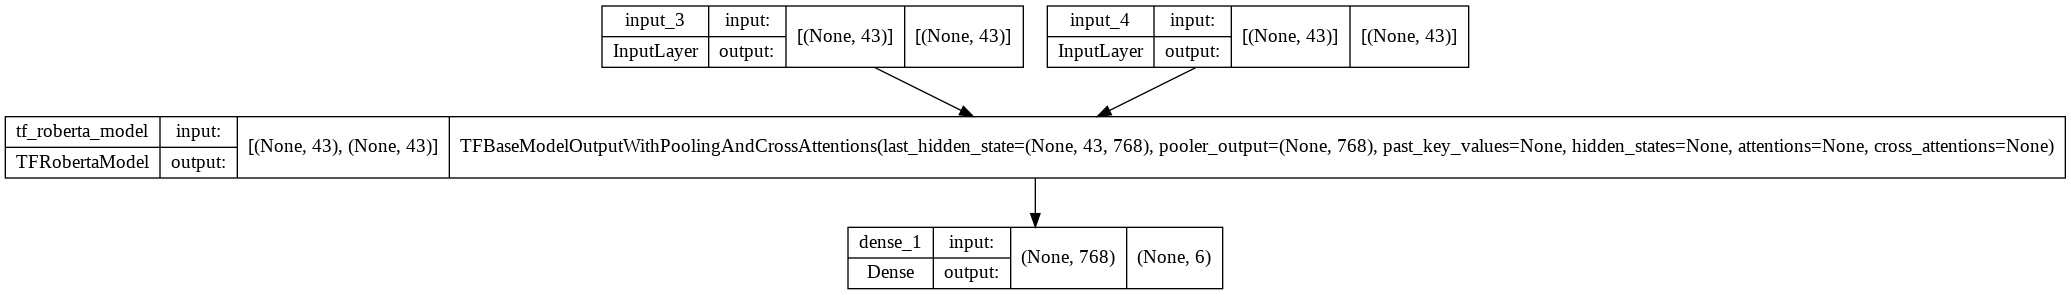

In [ ]:
tf.keras.utils.plot_model(model_roberta, to_file="my_model_roberta.png", show_shapes=True)

# 7.Entrenamiento del Modelo

## 7.1.Entrenamiento con Bert

In [ ]:
%%time
history_bert = model_bert.fit([train_input_ids_bert,train_attention_masks_bert], 
                              y_train, 
                              validation_data=([val_input_ids_bert,val_attention_masks_bert], y_val), 
                              epochs=4,
                              batch_size=100)

Epoch 1/4
322/322 [==============================] - 516s 2s/step - loss: 0.7002 - accuracy: 0.7343 - val_loss: 0.2514 - val_accuracy: 0.9190
Epoch 2/4
322/322 [==============================] - 482s 1s/step - loss: 0.1485 - accuracy: 0.9453 - val_loss: 0.2013 - val_accuracy: 0.9265
Epoch 3/4
322/322 [==============================] - 482s 1s/step - loss: 0.1017 - accuracy: 0.9607 - val_loss: 0.2049 - val_accuracy: 0.9240
Epoch 4/4
322/322 [==============================] - 481s 1s/step - loss: 0.0760 - accuracy: 0.9715 - val_loss: 0.1923 - val_accuracy: 0.9300
CPU times: user 21min 53s, sys: 2min 42s, total: 24min 36s
Wall time: 32min 53s


## 7.2.Entrenamiento con Roberta

In [ ]:
history_roberta = model_roberta.fit([train_input_ids_roberta,train_attention_masks_roberta], 
                                    y_train, 
                                    validation_data=([val_input_ids_roberta,val_attention_masks_roberta], y_val), 
                                    epochs=4,
                                    batch_size=100)

Epoch 1/4
322/322 [==============================] - 515s 2s/step - loss: 0.5560 - accuracy: 0.7896 - val_loss: 0.2453 - val_accuracy: 0.9120
Epoch 2/4
322/322 [==============================] - 486s 2s/step - loss: 0.1613 - accuracy: 0.9410 - val_loss: 0.1977 - val_accuracy: 0.9260
Epoch 3/4
322/322 [==============================] - 485s 2s/step - loss: 0.1259 - accuracy: 0.9508 - val_loss: 0.1906 - val_accuracy: 0.9210
Epoch 4/4
322/322 [==============================] - 485s 2s/step - loss: 0.1017 - accuracy: 0.9594 - val_loss: 0.1991 - val_accuracy: 0.9255


# 7.Medidas del Modelo

## 7.1.Medidas del modelo Bert

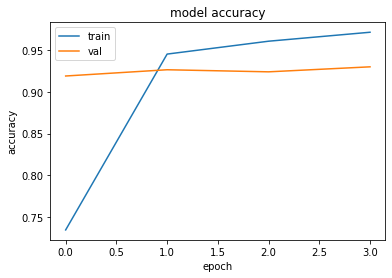

In [ ]:
plt.plot(history_bert.history['accuracy'])
plt.plot(history_bert.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

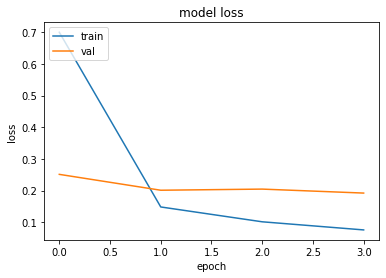

In [ ]:
plt.plot(history_bert.history['loss'])
plt.plot(history_bert.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 7.2.Medidas del modelo Roberta




Plotting Accuracy and Loss (Training and Validation)

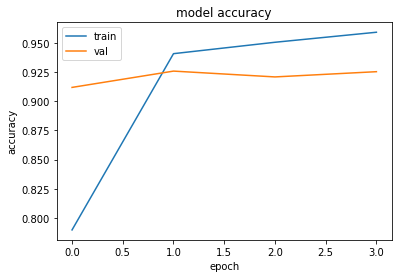

In [ ]:
plt.plot(history_roberta.history['accuracy'])
plt.plot(history_roberta.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

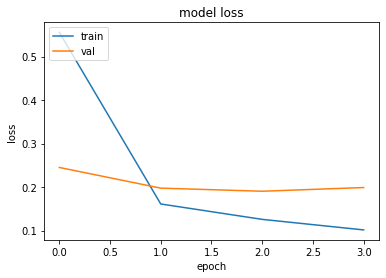

In [ ]:
plt.plot(history_roberta.history['loss'])
plt.plot(history_roberta.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# 8.Guardado y Carga de Modelos

## 8.1.Guardado de Modelos

Bert

In [ ]:
# Save the weights
model_bert.save_weights('my_modelo_bert')
model_bert.save_weights('my_modelo_bert.h5')
model_bert.save_weights('my_modelo_bert.hdf5')

RoBerta

In [ ]:
# Save the weights
model_roberta.save_weights('my_modelo_roberta')
model_roberta.save_weights('my_modelo_roberta.h5')
model_roberta.save_weights('my_modelo_roberta.hdf5')

## 8.2.Carga de Modelos

### 8.2.1.Bert

Creamos la arquitectura del modelo con la funcion **create_model_bert** creada en la **sección 6.1**

In [ ]:
# Creamos la arquitectura del modelo con la funcion create_model_bert creada en la sección 6.1
model_bert_load = create_model_bert(bert_model, max_len)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Cargamos los pesos guardados a la arquitectura previamente creada

In [ ]:
model_bert_load.load_weights('/content/drive/MyDrive/Colab Notebooks/TP2/model.v.2/my_modelo_bert.hdf5')

In [ ]:
# Resumen del Modelo
# model_bert_load.summary()

### 8.2.2.RoBerta

Creamos la arquitectura del modelo con la funcion **create_model_roberta** creada en la **sección 6.2**

In [ ]:
model_roberta_load = create_model_roberta(roberta_model, max_len)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Cargamos los pesos guardados a la arquitectura previamente creada

In [ ]:
model_roberta_load.load_weights('/content/drive/MyDrive/Colab Notebooks/TP2/model.v.2/my_modelo_roberta.hdf5')

In [ ]:
# Resumen del Modelo
# model_roberta_load.summary()

# 9.1.Predicciones

## 9.1.Predicciones con BERT sobre los datos de Test:

In [ ]:
result_bert = model_bert_load.predict([test_input_ids_bert,test_attention_masks_bert])
y_pred_bert = np.zeros_like(result_bert)
y_pred_bert[np.arange(len(result_bert)), result_bert.argmax(1)] = 1

Accuracy y F1 Score del Modelo

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_bert = accuracy_score(y_test, y_pred_bert)
print('Accuracy Bert:', accuracy_bert)
f1 = f1_score(y_test, y_pred_bert, average = 'macro')
print('F1 Score Bert:', f1)

Accuracy Bert: 0.9315
F1 Score Bert: 0.908226462491934


Imprimimos un Reporte de la Clasificación por etiquetas

In [ ]:
print('Reporte de Clasificación BERT:\n',classification_report(y_test,
                                                               y_pred_bert, 
                                                               target_names=['anger' ,'fear', 'joy' ,'love' ,'sadness' ,'surprise']))

Reporte de Clasificación BERT:
               precision    recall  f1-score   support

       anger       0.96      0.93      0.94       275
        fear       0.89      0.88      0.89       212
         joy       0.98      0.92      0.95       704
        love       0.80      0.95      0.87       178
     sadness       0.96      0.97      0.96       550
    surprise       0.77      0.93      0.84        81

   micro avg       0.93      0.93      0.93      2000
   macro avg       0.89      0.93      0.91      2000
weighted avg       0.94      0.93      0.93      2000
 samples avg       0.93      0.93      0.93      2000



Graficamos la matriz de confusión del modelo

In [ ]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))

    labels=['anger' ,'fear', 'joy' ,'love' ,'sadness' ,'surprise']
    
    ax=sns.heatmap(confusion_matrix(y, y_pred), 
                   annot=True, 
                   cmap="Blues", 
                   fmt='g', 
                   cbar=False, 
                   annot_kws={"size":10})
    
    plt.title(title, fontsize=15)
    ax.xaxis.set_ticklabels(labels, fontsize=10) 
    ax.yaxis.set_ticklabels(labels, fontsize=10)
    ax.set_ylabel('Datos Test', fontsize=15)
    ax.set_xlabel('Predicho', fontsize=15)
    plt.show()

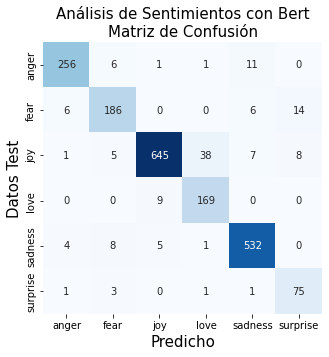

In [ ]:
conf_matrix(y_test.argmax(1),y_pred_bert.argmax(1),'Análisis de Sentimientos con Bert\nMatriz de Confusión')

## 9.2 Predicciones con RoBERTa sobre los datos de Test:

In [ ]:
result_roberta = model_roberta_load.predict([test_input_ids_roberta,test_attention_masks_roberta])
y_pred_roberta = np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(result_roberta)), result_roberta.argmax(1)] = 1

Accuracy y F1 Score del Modelo

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_roberta = accuracy_score(y_test, y_pred_roberta)
print('Accuracy RoBerta:', accuracy_roberta)
f1 = f1_score(y_test, y_pred_roberta, average = 'macro')
print('F1 Score RoBerta:', f1)

Accuracy RoBerta: 0.9345
F1 Score RoBerta: 0.9140047296112455


Imprimimos un Reporte de la Clasificación por etiquetas

In [ ]:
print('Reporte de Clasificación RoBERTa:\n',classification_report(y_test,
                                                                  y_pred_roberta, 
                                                                  target_names=['anger' ,'fear', 'joy' ,'love' ,'sadness' ,'surprise']))

Reporte de Clasificación RoBERTa:
               precision    recall  f1-score   support

       anger       0.92      0.97      0.95       275
        fear       0.90      0.90      0.90       212
         joy       0.99      0.91      0.95       704
        love       0.78      0.98      0.87       178
     sadness       0.98      0.95      0.96       550
    surprise       0.82      0.90      0.86        81

   micro avg       0.93      0.93      0.93      2000
   macro avg       0.90      0.94      0.91      2000
weighted avg       0.94      0.93      0.94      2000
 samples avg       0.93      0.93      0.93      2000



Graficamos la Matriz de Confusión

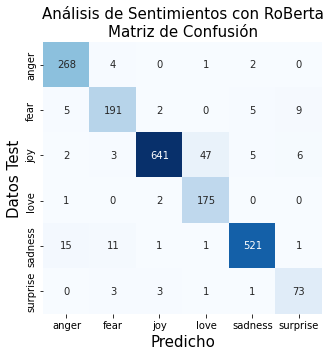

In [ ]:
conf_matrix(y_test.argmax(1),y_pred_roberta.argmax(1),'Análisis de Sentimientos con RoBerta\nMatriz de Confusión')

## 9.3.Comparativa de Modelos

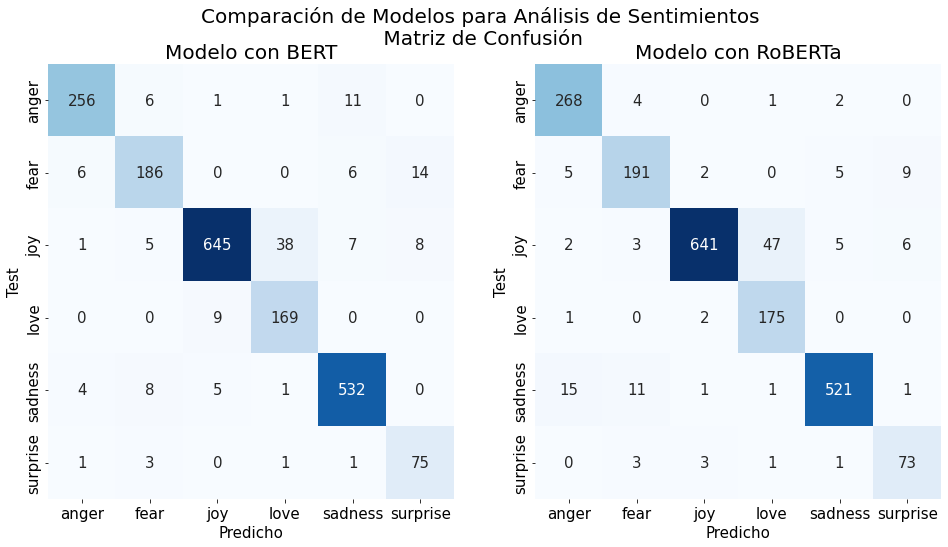

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,8))

labels=['anger' ,'fear', 'joy' ,'love' ,'sadness' ,'surprise']
plt.suptitle('Comparación de Modelos para Análisis de Sentimientos\n Matriz de Confusión', fontsize=20)

sns.heatmap(confusion_matrix(y_test.argmax(1),
                             y_pred_bert.argmax(1)), 
                             annot=True, cmap="Blues", 
                             fmt='g',
                             cbar=False, 
                             ax=ax[0], 
                             annot_kws={"size":15})

ax[0].set_title('Modelo con BERT', fontsize=20)
ax[0].set_yticklabels(labels, fontsize=15);
ax[0].set_xticklabels(labels, fontsize=15);
ax[0].set_ylabel('Test', fontsize=15)
ax[0].set_xlabel('Predicho', fontsize=15)

#########

sns.heatmap(confusion_matrix(y_test.argmax(1),
                             y_pred_roberta.argmax(1)), 
                             annot=True, 
                             cmap="Blues", 
                             fmt='g', 
                             cbar=False, 
                             ax=ax[1], 
                             annot_kws={"size":15})

ax[1].set_title('Modelo con RoBERTa', fontsize=20)
ax[1].set_yticklabels(labels, fontsize=15);
ax[1].set_xticklabels(labels, fontsize=15);
ax[1].set_ylabel('Test', fontsize=15)
ax[1].set_xlabel('Predicho', fontsize=15)

plt.show()

# 10.Inferencias utilizando nuestros Modelos

## 10.1.Inferencias con Bert

Creamos una Función que Plotea el Gráfico de Probabilidad de coincidencia con las Clases

In [ ]:
def plot_result_bert(result,texto):
  sns.barplot(x = 'Category', y = 'Confidence', data = result)
  plt.xlabel('Categoría', size=14)
  plt.ylabel('Coincidencia predicha [%]', size=14)
  plt.title('Modelo de Análsis de sentimientos con BERT\n Texto:'+ "\'"+ texto + "\'",size=16)

Creamos uns Función que tokeniza el texto a inferir, para ello utilizamos el objeto **tokenizerBert** creado en la **sección 5.1**

In [ ]:
def bert_inference_encode(data,maximum_length) :
  input_ids = []
  attention_masks = []

  encoded = tokenizerBert.encode_plus(data,
                                      add_special_tokens=True,
                                      max_length=maximum_length,
                                      pad_to_max_length=True,
                                      return_attention_mask=True)

  input_ids.append(encoded['input_ids'])
  attention_masks.append(encoded['attention_mask'])
  return np.array(input_ids),np.array(attention_masks)

Creamos una función que realiza la inferencia. 
donde:


1.   El texto ingresado es pre-procesado, limpiando su contenido con la función **preprocess** creada en la **sección 4.1**
2.   Se crea los **inputs ids** y las **attentions mask** necesarias para ingresar a nuestro modelo 
3.   Se realiza la Predicción
4.   Se imprime un resumen de la Predicción
5.   Se realiza un gráfico con la Predicción



In [ ]:
def inference_bert(text_sentence, max_len):
  # Preprocesamos el texto utlizando la función preprocess creada en la sección 4.1
  preprocessed_text = preprocess(text_sentence)
  
  # Creamos los Inputs Ids y las Attetion Masks de la frase a inferir 
  input_ids, attention_masks = bert_inference_encode(preprocessed_text, maximum_length = max_len)

  # Predecimos usando nuestro Modelo ya entrenado 
  result = model_bert_load.predict([input_ids, attention_masks])
  
  # Cargamos las categorias
  #ohe.categories_[0] = ['anger', 'fear', 'joy' ,'love' ,'sadness', 'surprise']
  
  # Creamos un DataFrame con las predicciones 
  result = pd.DataFrame(dict(zip(list(ohe.categories_[0]), [round(x*100, 2)for x in result[0]])).items(), columns = ['Category', 'Confidence'])
  
  return result

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


   Category  Confidence
0     anger        0.33
1      fear        0.03
2       joy        0.02
3      love        0.00
4   sadness       99.61
5  surprise        0.00


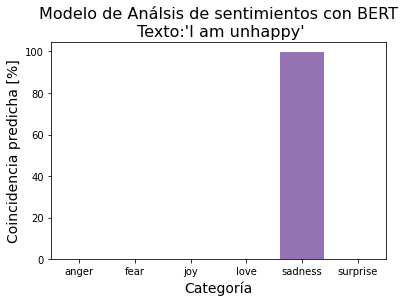

In [ ]:
# Ingresamos texto a inferir
sentence = "I am unhappy"

# Aplicamos la función de inferencia
result_bert = inference_bert(sentence, max_len)

# Imprime tabla de resultados
print(result_bert)

# Grafica los resultados
plot_result_bert(result_bert,sentence)

## 10.2.Inferencias con RoBerta

Creamos una Función que Plotea el Gráfico de Probabilidad de coincidencia con las Clases

In [ ]:
def plot_result_roberta(result,texto):
  sns.barplot(x = 'Category', y = 'Confidence', data = result)
  plt.xlabel('Categoría', size=14)
  plt.ylabel('Coincidencia predicha [%]', size=14)
  plt.title('Modelo de Análsis de sentimientos con RoBERTa\n Texto:'+ "\'"+ texto + "\'",size=16)

Creamos uns Función que tokeniza el texto a inferir, para ello utilizamos el objeto **tokenizerBert** creado en la **sección 5.1**

In [ ]:
def roberta_inference_encode(data,maximum_length) :
  input_ids = []
  attention_masks = []

  encoded = tokenizerRoberta.encode_plus(data,
                                          add_special_tokens=True,
                                          max_length=maximum_length,
                                          pad_to_max_length=True,
                                          return_attention_mask=True)

  input_ids.append(encoded['input_ids'])
  attention_masks.append(encoded['attention_mask'])
  return np.array(input_ids),np.array(attention_masks)

In [ ]:
def inference_roberta(text_sentence, max_len):
  # Preprocesamos el texto utlizando la función preprocess creada en la sección 4.1
  preprocessed_text = preprocess(text_sentence)
  
  # Creamos los Inputs Ids y las Attetion Masks de la frase a inferir 
  input_ids, attention_masks = roberta_inference_encode(preprocessed_text, maximum_length = max_len)

  # Predecimos usando nuestro Modelo ya entrenado 
  result = model_roberta_load.predict([input_ids, attention_masks])
  
  # Cargamos las categorias
  #ohe.categories_[0] = ['anger', 'fear', 'joy' ,'love' ,'sadness', 'surprise']

  # Creamos un DataFrame con las predicciones 
  result = pd.DataFrame(dict(zip(list(ohe.categories_[0]), [round(x*100, 2)for x in result[0]])).items(), columns = ['Category', 'Confidence'])
    
  return result

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


   Category  Confidence
0     anger       33.65
1      fear        2.31
2       joy        1.12
3      love        0.02
4   sadness       62.89
5  surprise        0.01


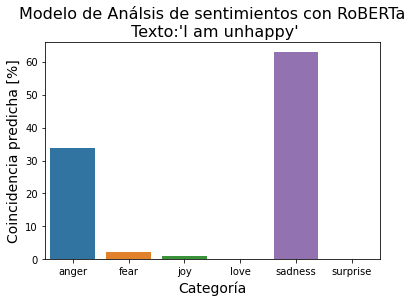

In [ ]:
# Ingresamos texto a inferir
sentence = "I am unhappy"

# Aplicamos la función de inferencia
result_roberta = inference_roberta(sentence, max_len)

# Imprime tabla de resultados
print(result_roberta)

# Graficamos los resultados
plot_result_roberta(result_roberta,sentence)

# 10.3.Comparativa y Automatización

In [ ]:
def plot_result(result_bert,result_roberta,texto):
  fig, ax = plt.subplots(1,2,figsize=(10,8))
  plt.suptitle('Modelos para Análisis de Sentimientos\nTexto:'+ "\'"+ texto + "\'", fontsize=15)

  sns.barplot(x = 'Category', y = 'Confidence', data = result_bert,ax=ax[0])
  ax[0].set_title('Modelo con BERT', fontsize=15)
  ax[0].set_ylim(0,100)
  ax[0].set_ylabel('Coincidencia predicha [%]', fontsize=10)
  ax[0].set_xlabel('Categoría', fontsize=10)


  sns.barplot(x = 'Category', y = 'Confidence', data = result_roberta,ax=ax[1])
  ax[1].set_title('Modelo con RoBERTa', fontsize=15)
  ax[1].set_ylim(0,100)
  ax[1].set_ylabel('Coincidencia predicha [%]', fontsize=10)
  ax[1].set_xlabel('Categoría', fontsize=10)

  plt.show()

In [ ]:
def inferir(texto):
  # Inferirmos con Bert
  result_bert = inference_bert(texto, max_len)

  # Inferimos con RoBERTa
  result_roberta = inference_roberta(texto, max_len)

  # Imprimimos tabala de resultados
  print("\n",result_bert,"\n \n",result_roberta)

  # Graficamos
  plot_result(result_bert,result_roberta,texto)

Ingrese el texto a Inferir:you're the best


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,



    Category  Confidence
0     anger        3.18
1      fear        0.06
2       joy       91.15
3      love        4.87
4   sadness        0.72
5  surprise        0.02 
 
    Category  Confidence
0     anger       31.36
1      fear        0.25
2       joy       63.40
3      love        1.07
4   sadness        3.81
5  surprise        0.10


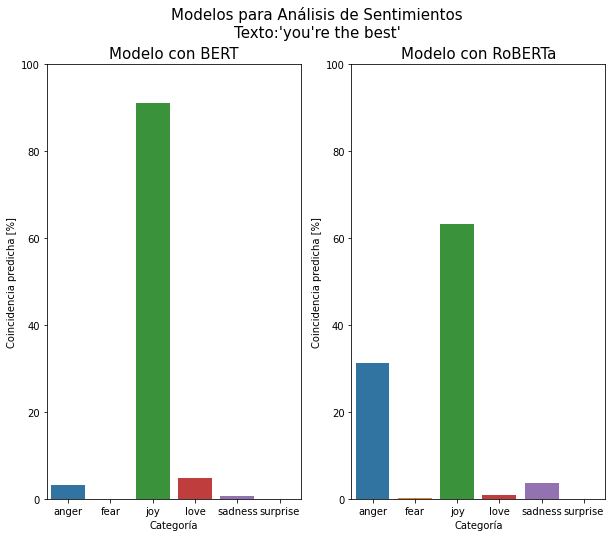

In [ ]:
# Ingresamos texto a Inferir
texto = input("Ingrese el texto a Inferir:")
#texto = "that was really unexpected"
#texto = "im grabbing a minute to post i feel greedy wrong"
#texto = "My dear friend"
inferir(texto)

# Conclusiones

Tanto BERT como RoBERTa, son modelos poderosísimos que han generado una revolución en el NLP.

Una gran ventaja de estos modelos pre-entrenados, es que además de existir modelos pre-entrenados en más de 100 idiomas, se pueden encontrar muchas librerías de código abierto que implementan BERT para diferentes tipos de aplicaciones del NLP.

# Referencias

*   BERT: el inicio de una nueva era en el Natural Language Processing: https://www.codificandobits.com/blog/bert-en-el-natural-language-processing/

* Hugging Face: roberta-base: https://huggingface.co/roberta-base

* Hugging Face: bert-base-uncased: https://huggingface.co/bert-base-uncased

* **Estructura del trabajo:** La estructura del mismo estará detallada en un ejemplo de Kaggle.Los txt correspondientes los encontrarán en el ejemplo de Kaggle como test.txt, train.txt y val.txt https://www.kaggle.com/dhruv1234/emotion-classification-roberta/notebook

*   Bert: https://arxiv.org/pdf/1810.04805.pdf

*   The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning): http://jalammar.github.io/illustrated-bert/

*   The Illustrated Transformer: https://jalammar.github.io/illustrated-transformer/

*   Attention Is All You Need: https://arxiv.org/pdf/1706.03762.pdf

*   Query,key,value vector: https://stats.stackexchange.com/questions/421935/what-exactly-are-keys-queries-and-values-in-attention-mechanisms